In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set_palette('deep')
sns.set_style('darkgrid')

In [3]:
months = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
sheet_id = '1quM2SQCyXHGd5zPc3y46FYjql_VoOQUqqwRtF9Ws0Xg'
sheet_name = months[9]
url = f'https://docs.google.com/spreadsheet/ccc?key={sheet_id}&output=xlsx'
df = pd.read_excel(url, sheet_name=sheet_name, header=2).iloc[:, 10:14]
df.head()

,Data,Valor,Descrição,Categoria
0,2023-10-02,13.50,99POP,Transporte
1,2023-10-02,96.00,TRI,Transporte
2,2023-10-02,188.82,CCG,Saúde
3,2023-10-03,21.00,Café,Alimentação
4,2023-10-03,280.00,Psicólogo,Saúde


In [4]:
df.dtypes

Data         datetime64[ns]
Valor               float64
Descrição            object
Categoria            object
dtype: object

In [5]:
total_categoria = df[['Valor', 'Categoria']].groupby('Categoria')
total_categoria = total_categoria.sum().sort_values('Valor', ascending=False)
total_categoria

,Valor
Categoria,
Pessoal,971.16
Transporte,637.48
Saúde,602.32
Alimentação,443.70
Internet,94.99
Outros,76.50
Presentes,37.00


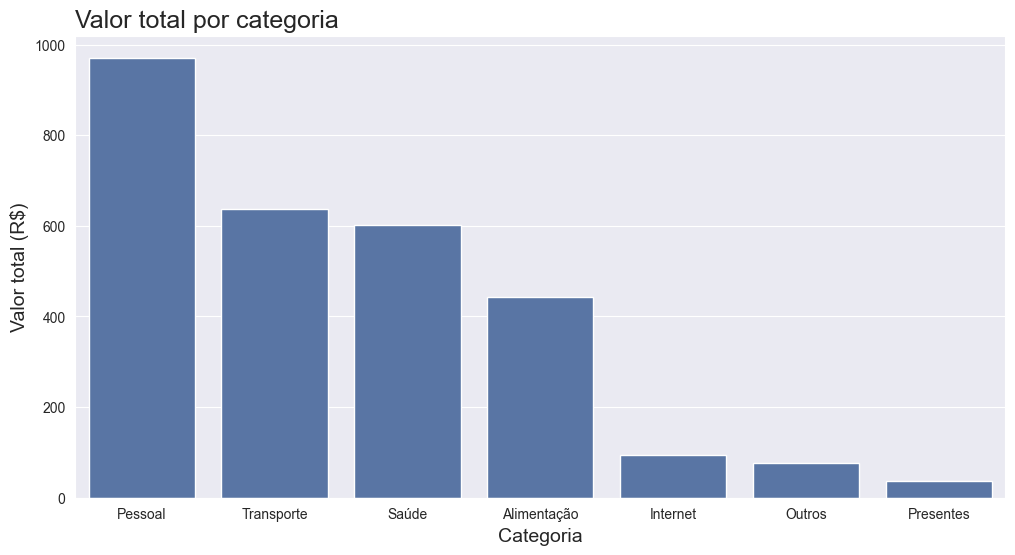

In [6]:
ax = sns.barplot(data = total_categoria, x = 'Categoria', y = 'Valor')
ax.figure.set_size_inches(12,6)
ax.set_title('Valor total por categoria', loc='left', fontsize=18)
ax.set_xlabel('Categoria', fontsize=14)
ax.set_ylabel('Valor total (R$)', fontsize=14)
plt.show()

In [7]:
valor_disponivel = 3649.92
categorias = set(total_categoria.index)
categoria_lazer = set(['Pessoal']) & categorias
categorias_fixas = categorias - categoria_lazer
custos_fixos = total_categoria.loc[list(categorias_fixas)].sum()
custos_lazer = total_categoria.loc[list(categoria_lazer)].sum().values[0]
guardar = valor_disponivel - (custos_fixos + custos_lazer)
economizado = ((guardar/valor_disponivel)*100).values[0]

print(f'Foi economizado {economizado:.2f}%')
print(f'Os custos fixos foram de {(custos_fixos/valor_disponivel).values[0]*100:.2f}%')
print(f'Os custos de lazer foram de {(custos_lazer/valor_disponivel)*100:.2f}%')

Foi economizado 21.56%
Os custos fixos foram de 51.84%
Os custos de lazer foram de 26.61%


In [8]:
mask = ((df['Descrição'] == 'Uber') | (df['Descrição'] == '99POP')) & ((df['Valor'] > 25) | (df['Valor'] < 15))
df_transporte_trabalho = df[~mask]
media_categoria = df_transporte_trabalho[['Valor', 'Descrição']].groupby('Descrição').mean()
categorias_desejadas = ['Almoço', 'Jantar', 'Café', '99POP', 'Uber']
categorias_presentes = media_categoria.index.isin(categorias_desejadas)
media_categoria[categorias_presentes].round(2)

,Valor
Descrição,
99POP,16.85
Almoço,38.50
Café,29.98
Jantar,36.90
Uber,19.93
